In [3]:
import numpy as np
import pandas as pd

In [4]:
dataset = pd.read_csv(r'C:\Users\Hetarth Jain\Desktop\python\Algorithms\Kmeans\players_22.csv')

C:\Users\Hetarth Jain\AppData\Local\Temp\ipykernel_24604\1481632961.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(r'C:\Users\Hetarth Jain\Desktop\python\Algorithms\Kmeans\players_22.csv')


In [5]:
dataset.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [6]:
features = ["overall", "potential","wage_eur","value_eur","age"]

In [7]:
dataset = dataset.dropna(subset=features)
#dropna() removes null or missing value

In [8]:
data = dataset[features].copy()

In [9]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [10]:
#STEPS FOR  K MEANS
# SCALE THE DATA
# INITIALIZE RANDOM CENTROID
# LABAEL EACH DATA
# Repeat steps 3 and 4 until centroids stop changing

In [11]:
# min - max scaling 
data = ( (data-data.min())/ (data.max() - data.min()) ) *9 + 1

In [12]:
data.describe()
# now the min is 1 and max is 10
# no one column will dominate in the analysis.
# we also preserved the variance in the data.

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [13]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [14]:
# centroids
centroid1 = data.apply( lambda x: float( x.sample()))
# apply iterates through each column in the dataset
# x.sample selects a single value from each column. 
# float turns the pandas series into a number.

# instead of this we also can give the centroid random a value from 1 to 10


C:\Users\Hetarth Jain\AppData\Local\Temp\ipykernel_24604\1129940016.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid1 = data.apply( lambda x: float( x.sample()))


In [15]:
centroid1
# this a single centroid

overall      5.108696
potential    5.108696
wage_eur     1.193133
value_eur    1.016980
age          2.666667
dtype: float64

In [16]:
# for k clusters we need k centroids we need ->
def random_centroids(data,k):
    centroids = []
    for i in range(k):
        centroid = data.apply( lambda x: float( x.sample()))
        
        centroids.append(centroid)
    return pd.concat(centroids, axis = 1)

In [17]:
centroids = random_centroids(data,5)

C:\Users\Hetarth Jain\AppData\Local\Temp\ipykernel_24604\4117086215.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply( lambda x: float( x.sample()))


In [18]:
centroids

,0,1,2,3,4
overall,5.108696,4.130435,2.956522,6.673913,5.695652
potential,7.260870,3.739130,4.326087,7.065217,6.478261
wage_eur,1.167382,1.064378,1.038627,1.991416,1.038627
value_eur,1.069173,1.486718,1.007005,1.021620,1.069173
age,5.000000,2.666667,1.333333,5.000000,2.666667


In [19]:
# labelling

# np.sqrt( ( (data - centroids.iloc[:,0] ** 2).sum(axis=1) )
def get_labels(data,centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data-x) ** 2).sum(axis=1) ))
    #distances represents the distance from each player to centroid of each cluster
    return distances.idxmin(axis=1)
# this gives the index value of the minimum value for each player (each row)
# this also tells us the cluster assignment (index from 0 to 4)

In [20]:
# here the closest cluster to player 0 is cluster 3 (with least distance)

In [21]:
labels = get_labels(data,centroids)
labels.value_counts()
# value_counts counts how many times each unique value occurs in a column
# 0 cluster gets 9721 players and so on.......

1    5519
4    4774
0    3295
3    2924
2    2653
Name: count, dtype: int64

In [22]:
# geometric mean-> gives the centre of each cluster
# np.exp(np.log(x).mean())
# take log of each datapoint in 'data' in a row of player and find mean of the all values in the row.
# then take the mean's exponent 
def new_centroids(data,labels,k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
# .T is transpose

In [23]:
# plot the cluster assignment in each stem/iteration

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output


In [24]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.fit_transform(centroids.T)
    clear_output(wait = True)
    #plotting
    plt.title(f'Iteration{iteration}')
    plt.scatter(x = data_2d[:,0], y = data_2d[:,1], c=labels)
    plt.scatter(x = centroids_2d[:,0], y = centroids_2d[:,1] )
    plt.show()

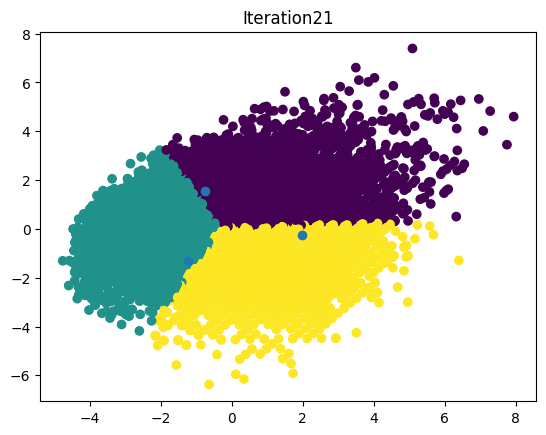

In [25]:
k=3
N=100
centroids = random_centroids(data,k)
old_centroids = pd.DataFrame()
iteration=1

while iteration < N and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data,centroids)
    centroids = new_centroids(data,labels,k)
    plot_clusters(data,labels,centroids,iteration)
    iteration += 1

In [26]:
centroids

,0,1,2
overall,5.807503,3.205672,4.781960
potential,6.497870,4.930905,4.506813
wage_eur,1.420500,1.028564,1.118498
value_eur,1.285685,1.026655,1.044909
age,3.598215,2.514741,5.467648


In [27]:
# play[labels==2][["short_name"]+features]